In [1]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt

# a

In [10]:
X = pd.DataFrame(scipy.io.loadmat('rand')["dataset"][0][0][0])

In [11]:
Y = pd.DataFrame(scipy.io.loadmat('rand')["dataset"][0][0][1])

In [98]:
import math

def find_cluster(X, k, mu):
    for i, x in X.iterrows():
        best_distance = math.inf
        best_cluster = None
        for j in range(k):
            new_distance = np.linalg.norm(x-mu.iloc[j])
            if new_distance < best_distance:
                best_distance = new_distance
                best_cluster = j
        
        
        X.at[i, "cluster"] = best_cluster
            
    return X

In [5]:
def calculate_means(X, k):
    data_list = []
    for i in range(k):
        data_list.append(X[X["cluster"]==i].mean())
    
    mu = pd.DataFrame(data_list)
    return mu

In [6]:
def sse_error(X, k):
    error = 0
    for i in range(k):
        X_cluster = X[X["cluster"]==i]
        m = X_cluster.mean()
        for index, x in X_cluster.iterrows():
            error += np.linalg.norm(x-m)**2
    return error

In [7]:
import math

def kmeanscluster(X, k, mu, tol, maxIter):
    prev_error = math.inf
    for iter in range(maxIter):
        X = find_cluster(X, k, mu)
        mu = calculate_means(X, k)
        new_error = sse_error(X, k)
        if iter%5==0:
            print(iter, new_error)
        if prev_error - new_error < tol:
            break
        prev_error = new_error
    return X

0 464421.6894472773
5 301537.9730243137
0 194356.0324796488
5 158625.03115714216
0 243279.97463263464
5 140196.39874207662
10 133532.9640491694
15 128186.6580141658
20 117442.5186996278
0 84109.7082079501
5 65883.4390804285
10 63356.016318462636


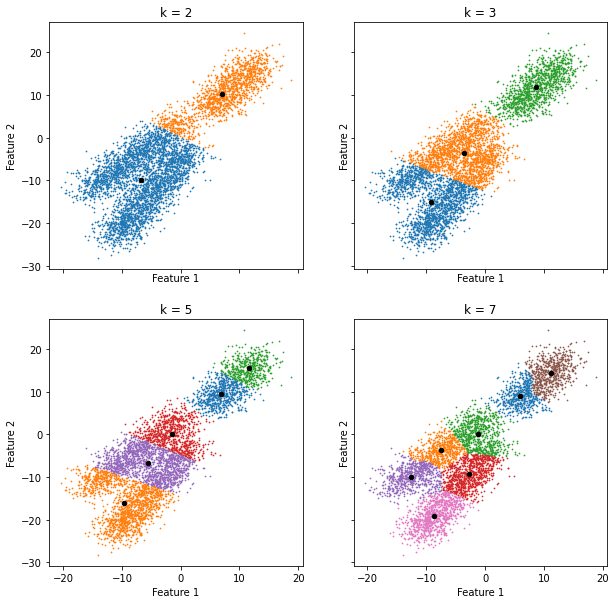

In [8]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True)

for ki, k in enumerate([2, 3, 5, 7]):
    mu = X.sample(n=k)

    C = kmeanscluster(X=X, k=k, mu=mu, tol=100, maxIter=25)

    means_0 = []
    means_1 = []

    for i in range(k):
        ax[int(ki/2)][ki%2].scatter(C[C["cluster"]==i][0], C[C["cluster"]==i][1], s=0.5)
        ax[int(ki/2)][ki%2].set_title(f"k = {k}")
        means_0.append(C[C["cluster"]==i][0].mean())
        means_1.append(C[C["cluster"]==i][1].mean())

    ax[int(ki/2)][ki%2].scatter(means_0, means_1, c="black", s=20)
    plt.setp(ax[int(ki/2)][ki%2], xlabel="Feature 1", ylabel="Feature 2")

fig.set_size_inches(10,10)
plt.show()    

# b

0 919342.9152190366
0 368713.59412334027
5 299607.4038572601
0 304750.1358728797
5 182788.59268776898
10 158832.3335236236
0 564112.3764162044
5 124834.91276396911
10 118845.66852907989
0 133617.88404678446
5 99241.80891690562
0 105542.22483046658
5 79087.68525860278
10 75308.55351723853
0 82776.72450972434
5 64390.43649245789
10 63415.613459344735
0 70522.2843478685
5 62123.13196513142
0 69917.15809544227
5 63047.01170686513
10 60660.8327185513
15 58581.87348372501
20 57697.96939179032
0 53931.56746043155
5 44987.69541286233


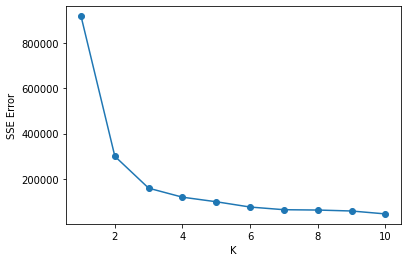

In [14]:
k_list = []
error_list = []

for k in range(1,11):
    mu = X.sample(n=k)

    
    C = kmeanscluster(X=X, k=k, mu=mu, tol=100, maxIter=25)
    
    k_list.append(k)
    error_list.append(sse_error(C, k))
    
plt.scatter(k_list, error_list)
plt.plot(k_list, error_list)
plt.xlabel("K")
plt.ylabel("SSE Error")
plt.title("")
plt.show()

# c

In [82]:
def medoid_error(X, med):
    error = 0
    for item, x in X.iterrows():
        error += np.linalg.norm(x[:2]-med.iloc[int(x["cluster"])])
    return error

In [83]:
def is_medoid(med, row):
    for i in range(len(med)):
        if (med.iloc[i].values == row.values).all():
            return True
    return False

In [127]:
from copy import deepcopy
def kmedoidscluster(X, k, med, tol):
    X = find_cluster(X,k,med)
    prev_error = medoid_error(X, med)

    for i in range(k):
        print(f"i = {i}")
        for j in range(len(X)):
            if not is_medoid(med, X.drop(columns=["cluster"]).iloc[j]):
                X_new = deepcopy(X).drop(columns=["cluster"])
                med_new = deepcopy(med)
                
                med_new.iloc[i] = X_new.iloc[j]
                
                X_new = find_cluster(X_new,k,med_new)

                new_error = medoid_error(X_new, med_new)

                if new_error < prev_error:
                    prev_error = new_error
                    med.iloc[i] = X.drop(columns=["cluster"]).iloc[j]
                    X = deepcopy(X_new)
    return X, med

i = 0
i = 1
i = 0
i = 1
i = 2
i = 0
i = 1
i = 2
i = 3
i = 4
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6


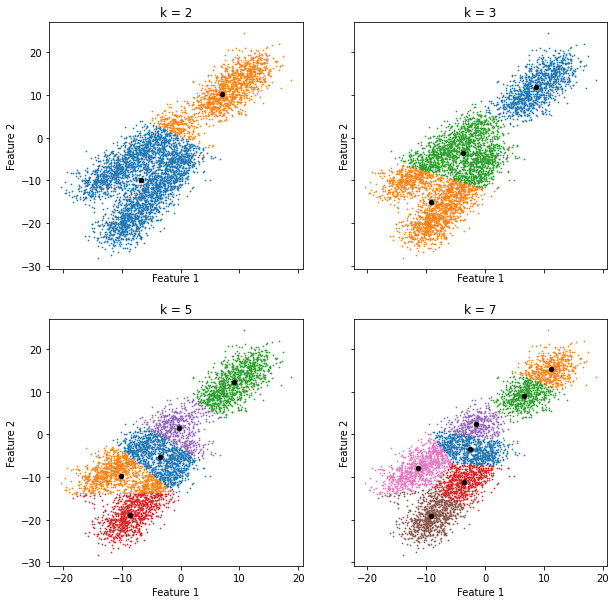

In [130]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True)

for ki, k in enumerate([2, 3, 5, 7]):
    X = pd.DataFrame(scipy.io.loadmat('rand')["dataset"][0][0][0]).sample(frac=0.05)

    med = X.sample(n=k)

    C, med = kmedoidscluster(X=X, k=k, med=med, tol=100)

    C = pd.DataFrame(scipy.io.loadmat('rand')["dataset"][0][0][0])
    C = find_cluster(C,k,med)

    means_0 = []
    means_1 = []

    for i in range(k):
        ax[int(ki/2)][ki%2].scatter(C[C["cluster"]==i][0], C[C["cluster"]==i][1], s=0.5)
        ax[int(ki/2)][ki%2].set_title(f"k = {k}")
        means_0.append(C[C["cluster"]==i][0].mean())
        means_1.append(C[C["cluster"]==i][1].mean())

    ax[int(ki/2)][ki%2].scatter(means_0, means_1, c="black", s=20)
    plt.setp(ax[int(ki/2)][ki%2], xlabel="Feature 1", ylabel="Feature 2")

fig.set_size_inches(10,10)
plt.show() 

# d

In [132]:
X = pd.read_csv("gene_ex.csv", header=None).T

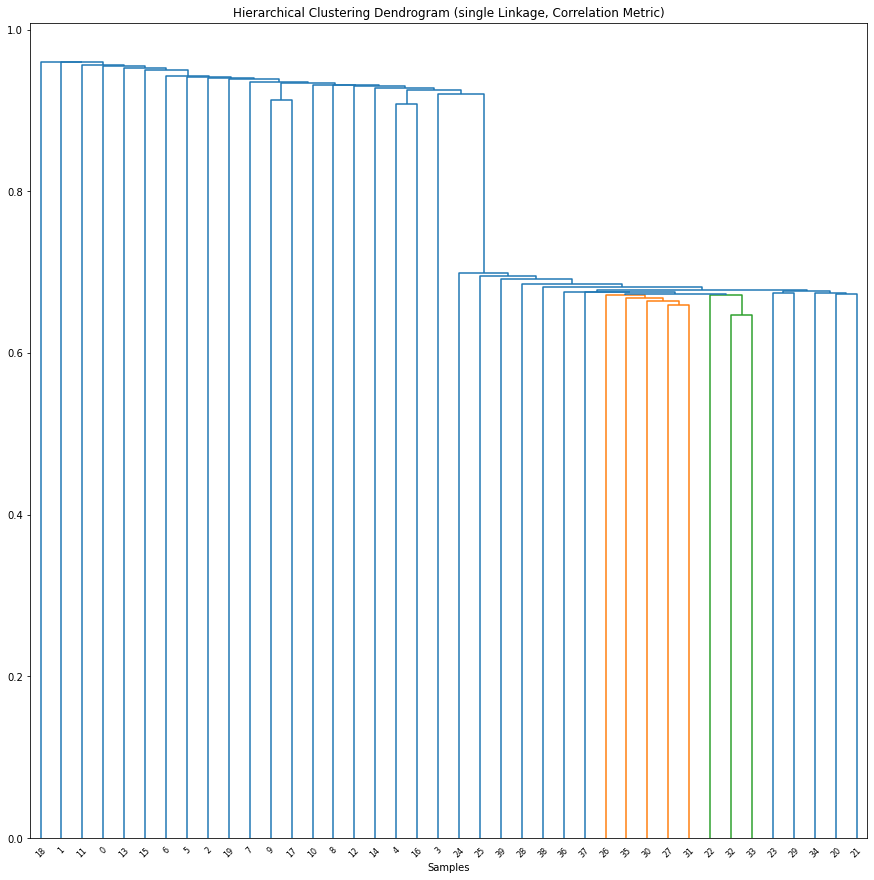

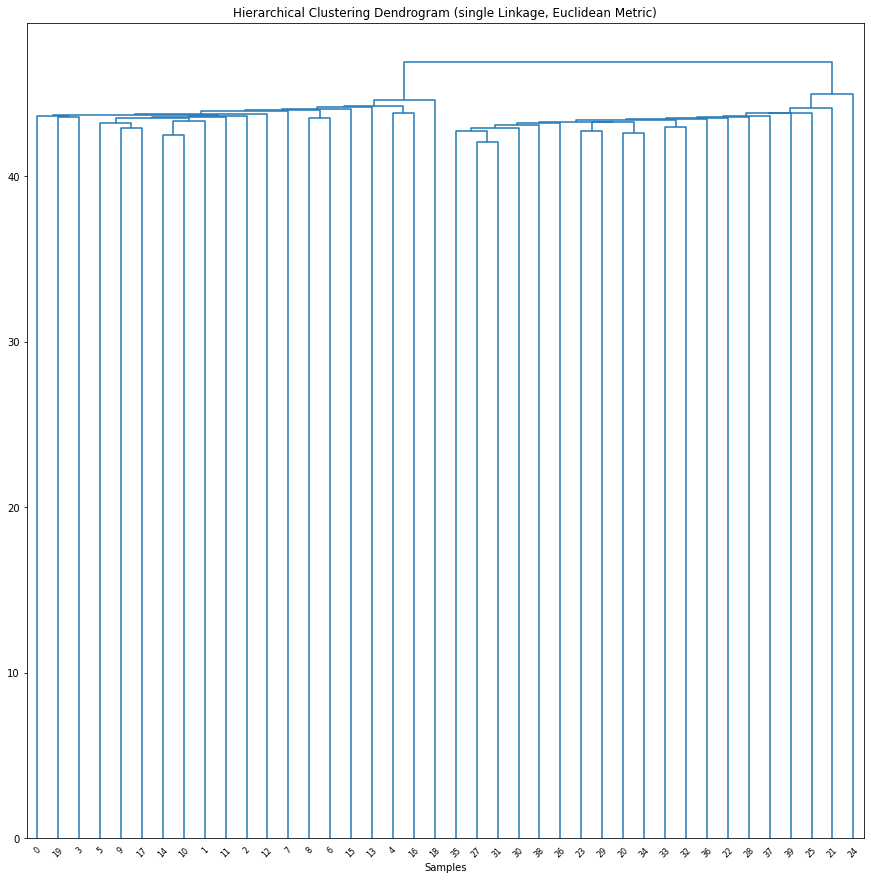

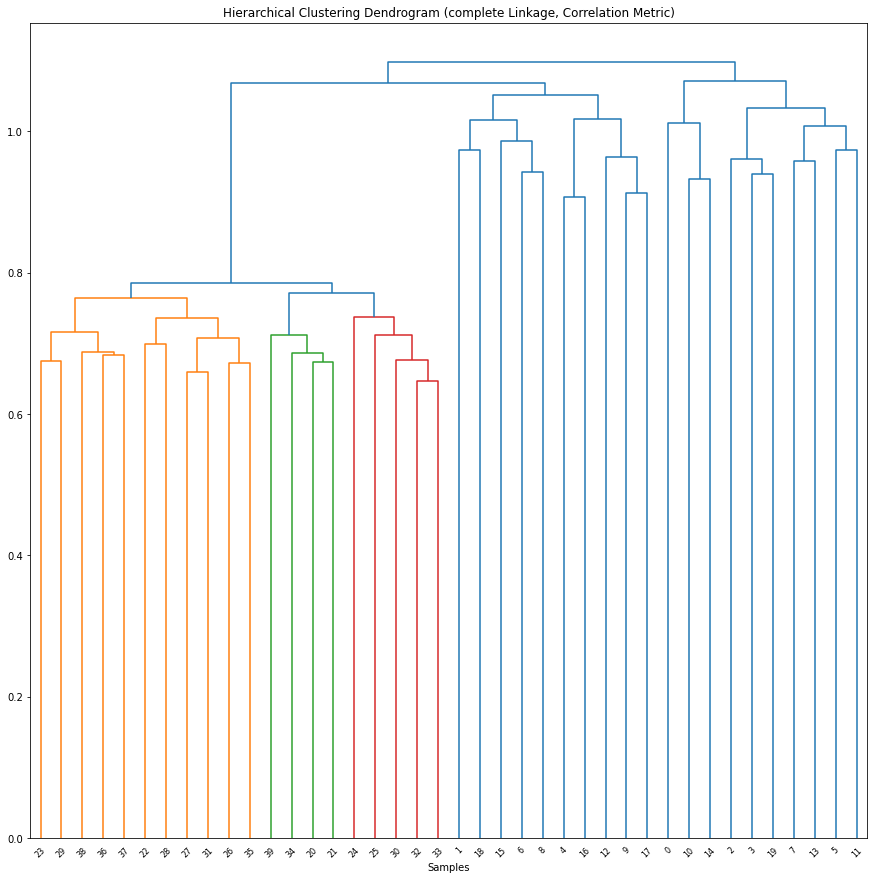

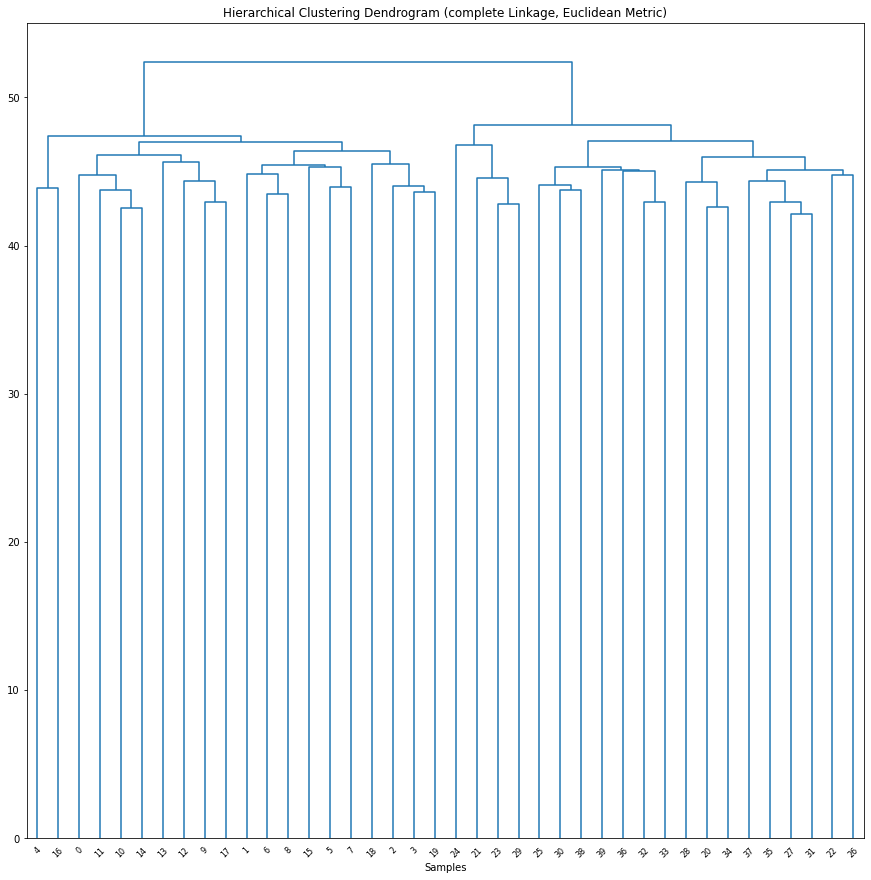

In [155]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
# https://stackoverflow.com/questions/32303217/how-to-use-pearson-correlation-as-distance-metric-in-scikit-learn-agglomerative

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import pearsonr

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


def correlation_affinity(M):
    return 1 - np.array([[pearsonr(a,b)[0] for a in M] for b in M])

for i, setting in enumerate([(correlation_affinity, 'single'), ('euclidean', 'single'), (correlation_affinity, 'complete'), ('euclidean', 'complete')]):

    model = AgglomerativeClustering(n_clusters=2, affinity=setting[0], linkage=setting[1] ,compute_distances=True)

    model = model.fit(X)
    
    if setting[0]=="euclidean":
        plt.title(f"Hierarchical Clustering Dendrogram ({setting[1]} Linkage, Euclidean Metric)")
    else:
        plt.title(f"Hierarchical Clustering Dendrogram ({setting[1]} Linkage, Correlation Metric)")
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode="level", p=40)
    plt.xlabel("Samples")
    plt.gcf().set_size_inches(15,15)
    plt.show()


# e

In [162]:
X_normal=(X-X.mean())/X.std()

In [174]:
X_dif = abs(X_normal[:20].mean() - X_normal[20:].mean())

In [177]:
np.argmax(X_dif.values)

501

In [190]:
(-X_dif.values).argsort()[:5]

array([501, 588, 599, 589, 564], dtype=int64)

In [178]:
X_dif[501]

1.6952665271510088

In [191]:
X_normal[:20][501].values

array([-1.52845421, -0.58021854, -1.93031018, -1.28392566, -0.77952711,
       -0.54833031, -1.47272442, -1.45101975, -0.45688445, -0.94020107,
       -0.50510971, -0.91396638, -0.31194536, -1.04759794, -0.69417464,
       -1.38561324, -0.71787106, -0.2322229 ,  0.30536933, -0.47793766])

In [192]:
X_normal[20:][501].values

array([ 1.10611042,  1.09182186,  1.42296257,  1.62234018,  0.67175174,
        0.73910773,  0.18515047, -0.41579474,  0.5522651 ,  0.7600582 ,
        0.89208648,  1.23913942,  1.54436071,  0.78668918,  0.86799993,
        0.1780988 ,  1.28143479,  0.86786468,  1.1022941 ,  0.45692363])